# ANN - Regresión Caso Ecommerce

In [1]:
import pandas as pd
import numpy as np

## Lectura de Datos

In [3]:
df = pd.read_csv('Ecommerce.csv')

In [4]:
df.head(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


## Limpieza de Datos

In [9]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

## Planteamiento del modelo

In [12]:
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']

## Preprocesamiento

Haremos lo siguiente:

*   Escalamiento



### Escalamiento

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_enc = scaler.fit_transform(X)

In [21]:
X_enc[:2]

array([[ 1.45635117,  0.60728003,  2.49358859,  0.55010651],
       [-1.13650215, -0.94946372,  0.20655573, -0.87092735]])

### Validacion Cruzada

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Arquitectura de la red neuronal

La arquitectura es un arte. En este caso, utilizaremos capas densas (fully connected)

*  Probar con activation: relu, tanh, linear
*  Probar optimizadores: Adam, SGD, RMSProp, Adagrad
*  Probar combinaciones de capas

In [56]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model


In [58]:
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(20, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(1, activation='linear'))

In [77]:
def r2(y_true, y_pred):
    # Usamos tf.reduce_sum y tf.reduce_mean en lugar de K.sum y K.mean
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred)) 
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true))) 
    # K.epsilon() sigue existiendo en tf.keras.backend, pero 1e-7 es el estándar
    return (1 - SS_res / (SS_tot + tf.keras.backend.epsilon()))

In [79]:
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.01),
              metrics=[r2])

In [81]:
from keras import backend as K

### Visualización del modelo

In [85]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 20)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

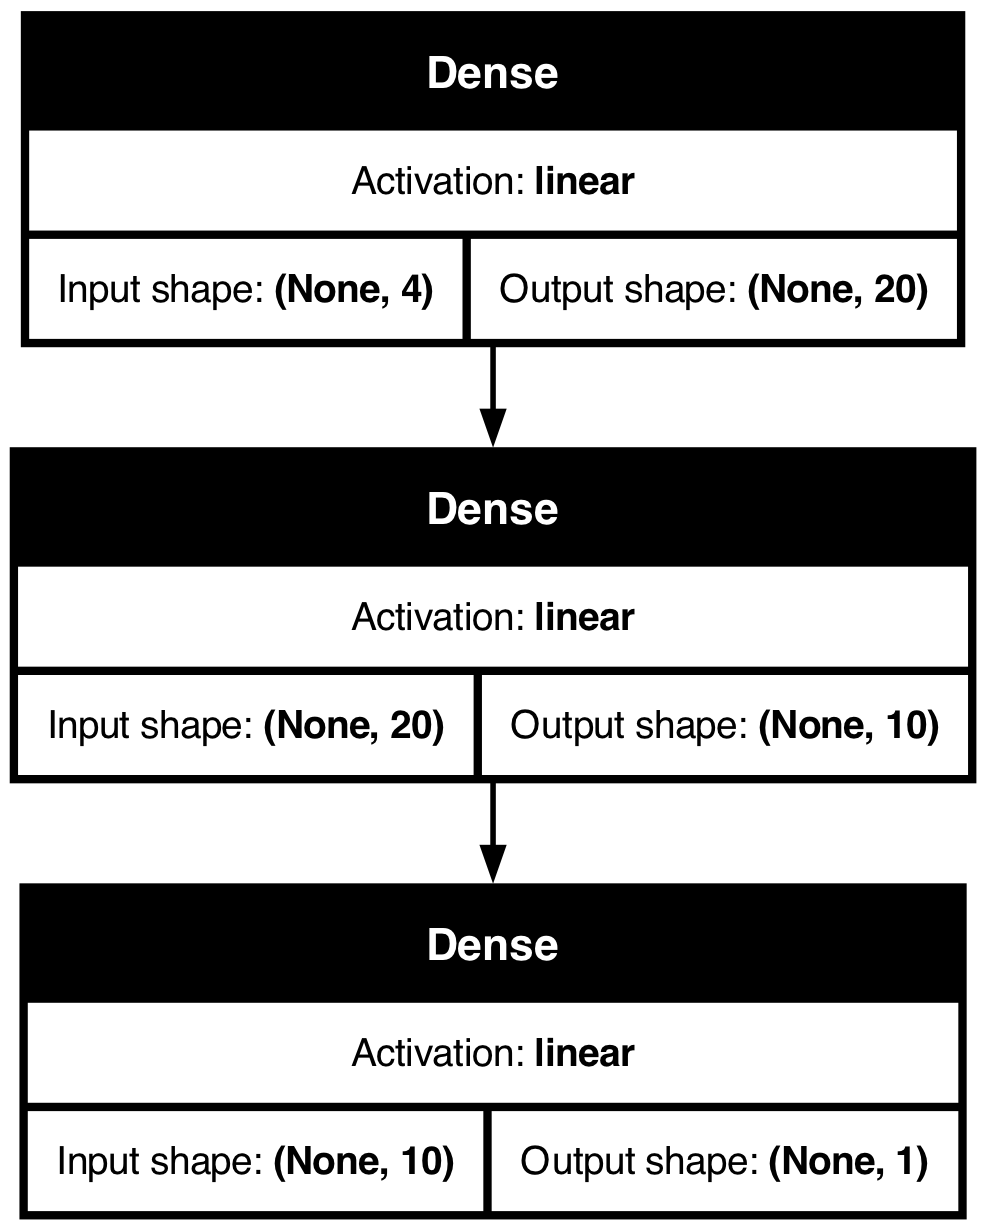

In [87]:
plot_model(model, show_shapes=True, show_layer_activations=True)

### Entrenamiento

In [90]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 213796.8750 - r2: -32.4413 - val_loss: 174601.0000 - val_r2: -30.7925
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 166496.3281 - r2: -22.8559 - val_loss: 128105.6328 - val_r2: -22.3263
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 119650.4297 - r2: -16.9020 - val_loss: 80884.1875 - val_r2: -13.7279
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 74667.4688 - r2: -9.9227 - val_loss: 37672.4062 - val_r2: -5.8596
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 32965.8398 - r2: -3.8616 - val_loss: 9466.0674 - val_r2: -0.7236
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10409.7422 - r2: -0.5924 - val_loss: 7272.8843 - val_r2: -0.3243
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10902.8125 - r2: -0.7017 - val_loss: 19397.8477 - val_r2: -2.5321
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 21959.5645 - r2: -2.2894 - val_loss: 18852.2949 - val_r2: -2.4328
Epoch 9

## Evaluación

In [93]:
from sklearn.metrics import r2_score

In [95]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [97]:
r2_score(y_test,y_pred)

0.18779173624437195

## Evolución del entrenamiento

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

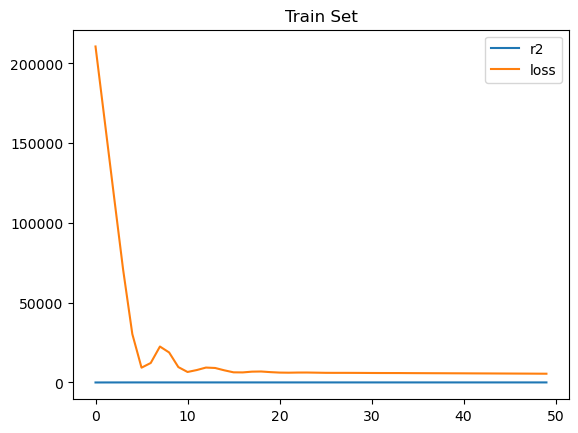

In [102]:
plt.title('Train Set')
plt.plot(history.history['r2'], label='r2')
plt.plot(history.history['loss'], label='loss')
plt.legend(loc=0)

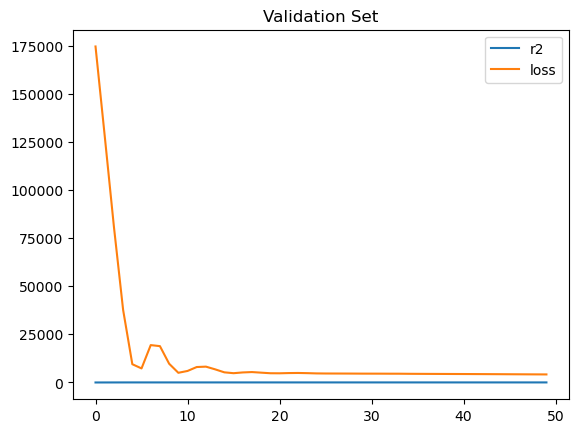

In [104]:
plt.title('Validation Set')
plt.plot(history.history['val_r2'], label='r2')
plt.plot(history.history['val_loss'], label='loss')
plt.legend(loc=0)